### Problem Statement

**Title: Analysis of Restaurant Cost Trends Across Localities**

**Objective:**
The primary objective of this project is to analyze the average cost for two people across different localities based on a dataset of restaurants. The project will identify the locality with the highest average cost and examine how factors such as restaurant type, cuisine, and location influence the pricing trends in various localities. By doing so, it will provide insights into regional price patterns, potentially helping restaurant owners, consumers, and marketers make informed decisions.

### Dataset Overview

In this analysis, we are working with two datasets: 

### **1. Zomato Restaurant Data (`df1.csv`)**

This dataset contains information about various restaurants in Bangalore, including details about restaurant types, cuisines, ratings, and pricing. The columns in this dataset are as follows:

| Column Name            | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| **online_order**        | Indicates if online ordering is available (Yes/No)                          |
| **book_table**          | Indicates if table booking is available (Yes/No)                            |
| **rate**                | Average rating (e.g., 4.1/5)                                                 |
| **votes**               | Number of votes received by the restaurant                                  |
| **rest_type**           | Type of restaurant (e.g., Casual Dining, Quick Bites)                       |
| **dish_liked**          | Popular dishes liked by customers                                           |
| **cuisines**            | Cuisines offered by the restaurant                                          |
| **approx_costfor_two_people** | Approximate cost for two people in INR                                  |
| **listed_intype**       | Restaurant listing category (e.g., Buffet, Delivery)                        |
| **listed_incity**       | Local area in Bangalore where the restaurant is located                     |

### **2. Geographical Coordinates Data (`df2.csv`)**

This dataset contains the geographical coordinates (latitude and longitude) of restaurants in Bangalore, which will be merged with the Zomato restaurant data for geospatial analysis. The columns in this dataset are:

| Column Name     | Description                                          |
|-----------------|------------------------------------------------------|
| **listed_incity** | Local area name (used for merging)                  |
| **Latitude**    | Latitude of the location                            |
| **Longitude**   | Longitude of the location                           |


By combining these two datasets, we will be able to perform location-based analysis and create interactive maps showing restaurant density and cuisine-specific trends in different areas of Bangalore.


In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.core.display import display, HTML
import time
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings("ignore")

C:\Users\degal\AppData\Local\Temp\ipykernel_28248\1303858825.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Load the Zomato Restuarnt Data

In [4]:
df1 = pd.read_csv(r"C:\Users\degal\Downloads\zomato_data.csv")
df1.head()

online_order book_table   rate  votes            rest_type  \
0          Yes        Yes  4.1/5    775        Casual Dining   
1          Yes         No  4.1/5    787        Casual Dining   
2          Yes         No  3.8/5    918  Cafe, Casual Dining   
3           No         No  3.7/5     88          Quick Bites   
4           No         No  3.8/5    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                       800        Buffet   
1     Chinese, North Indian, Thai                       800        Buffet   
2          Cafe, Mexican, Italian                       800        Buffet   
3      South Indian, North Indian                       300        Buffet   
4        North Indian, Rajasthani                       600        Buffet   

  listed_incity  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

### shape of a dataset

In [5]:
df1.shape

(51717, 10)

### Load the Geographical Coordinates Dataset


In [6]:
df2 = pd.read_csv(r"C:\Users\degal\Downloads\Geographical Coordinates.csv")
df2.head()

listed_incity   Latitude  Longitude
0       Banashankari  12.939333  77.553982
1  Bannerghatta Road  12.952660  77.605048
2       Basavanagudi  12.941726  77.575502
3          Bellandur  12.925352  77.675941
4       Brigade Road  12.967358  77.606435

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


### check for duplicates

In [8]:
df1.duplicated().sum()

809

### Drop the Duplicates

In [9]:
df1 = df1.drop_duplicates(keep = "first")

### Check for the null values in each column

In [10]:
df1.isnull().sum()

online_order                     0
book_table                       0
rate                          7111
votes                            0
rest_type                      225
dish_liked                   27313
cuisines                        43
approx_costfor_two_people      341
listed_intype                    0
listed_incity                    0
dtype: int64

### checking the columns we have

In [13]:
df1.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype',
       'listed_incity'],
      dtype='object')

### check the basic stats of the data

In [41]:
df1.describe().T

count        mean         std   min    25%  \
online_order               50908.0    0.594307    0.491030   0.0    0.0   
book_table                 50908.0    0.126031    0.331888   0.0    0.0   
rate                       50908.0    3.700279    0.398011   1.8    3.5   
votes                      50908.0  287.179500  808.103237   0.0    7.0   
approx_costfor_two_people  50908.0  558.002180  438.897889  40.0  300.0   

                             50%    75%      max  
online_order                 1.0    1.0      1.0  
book_table                   0.0    0.0      1.0  
rate                         3.7    3.9      4.9  
votes                       42.0  203.0  16832.0  
approx_costfor_two_people  400.0  700.0   6000.0

###  Finding outliers by IQR Methode

In [42]:
def findoutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [43]:
outliers_cost = findoutliers(df1, 'approx_costfor_two_people')
outliers_rate = findoutliers(df1, 'rate')
outliers_votes = findoutliers(df1, 'votes')
print("Outliers in 'approx_costfor_two_people':")
print(outliers_cost)
print("\nOutliers in 'rate':")
print(outliers_rate)
print("\nOutliers in 'votes':")
print(outliers_votes)

Outliers in 'approx_costfor_two_people':
       online_order  book_table  rate  votes                    rest_type  \
207               1           1   4.1   2339                Casual Dining   
476               1           1   4.1    970  Microbrewery, Casual Dining   
868               0           1   4.7   3845                Casual Dining   
1080              1           0   3.6     42           Casual Dining, Bar   
1135              1           1   4.2    611           Casual Dining, Bar   
...             ...         ...   ...    ...                          ...   
51707             0           0   3.9     77             Fine Dining, Bar   
51712             0           0   3.6     27                          Bar   
51714             0           0   3.7      0                          Bar   
51715             0           1   4.3    236                          Bar   
51716             0           0   3.4     13           Bar, Casual Dining   

                                  

### Visualizing the outliers 

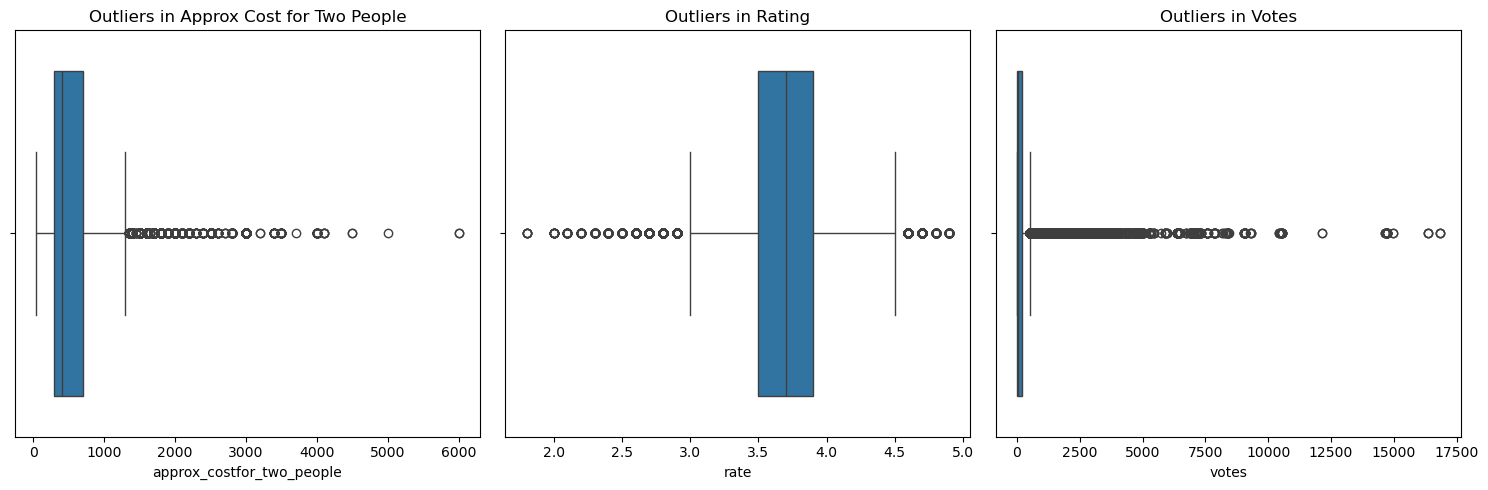

In [44]:
plt.figure(figsize=(15, 5))

# Boxplot for approx_costfor_two_people
plt.subplot(1, 3, 1)
sns.boxplot(x=df1['approx_costfor_two_people'])
plt.title('Outliers in Approx Cost for Two People')

# Boxplot for rate
plt.subplot(1, 3, 2)
sns.boxplot(x=df1['rate'])
plt.title('Outliers in Rating')

# Boxplot for votes
plt.subplot(1, 3, 3)
sns.boxplot(x=df1['votes'])
plt.title('Outliers in Votes')

plt.tight_layout()
plt.show()

### Insights
1. **Approx Cost for Two People**

- Most restaurants have a cost below ₹1000.

- Some restaurants have costs going above ₹5000.

- These high-cost values are outliers.
 
- By this we can say most restaurants are affordable, but some premium ones charge a lot more, which could indicate fine dining or luxury services.



2. **Rating**

- Most ratings are between 3.0 and 4.5.

- A few restaurants have very low (below 2) or perfect (5) ratings — these are outliers.
  
- Ratings are mostly good across restaurants. Very low or perfect ratings are rare, which may indicate strong customer opinions.

3. **Votes**

- A large number of restaurants have fewer than 500 votes.
 
- Some have very high votes (above 10,000), which are clear outliers.
  
- Most restaurants don’t get a lot of votes, but a few are very popular, getting thousands of votes. These may be famous restaurants.

### Why I am keeping outliers not removing them

- This is an analysis-focused project, we are not doing any prediction or model building

- **Outliers give valuable insights about:**

   - Luxury or high-end restaurants (cost outliers).
    
   - Popular or trending places (votes outliers).
    
   - Extreme user experiences (very high or low ratings).


They help us understand every thing about the restaurant behavior and customer feedback. Removing them might hide interesting and important patterns.


### clean the rate column

In [28]:
### cleaning the rate column
df1['rate'] = df1['rate'].replace('NEW',np.nan).replace('-',np.nan)

In [29]:
df1['rate'] = df1['rate'].str.replace('/5', '').astype(float)


In [30]:
df1['rate'] = pd.to_numeric(df1['rate'])


In [31]:
median = df1['rate'].median()
median

3.7

In [32]:
df1["rate"] = df1["rate"].fillna(median)

In [33]:
df1["rate"].isnull().sum()

0

### cleaning cost column

In [18]:
### cleaning cost column
df1['approx_costfor_two_people'] = df1['approx_costfor_two_people'].astype(str).str.replace(',', '')
df1['approx_costfor_two_people'] = pd.to_numeric(df1['approx_costfor_two_people'], errors='coerce')
df1['approx_costfor_two_people']= df1['approx_costfor_two_people'].fillna(df1['approx_costfor_two_people'].median())


In [19]:
df1['dish_liked'].fillna("Not Available", inplace=True)


In [20]:
df1['cuisines'].fillna("Other", inplace=True)

In [21]:
df1['rest_type'].fillna("Unknown", inplace=True)

In [22]:
df1['votes'].fillna(df1['votes'].median(), inplace=True)

In [23]:
df1.isnull().sum()

online_order                    0
book_table                      0
rate                         7111
votes                           0
rest_type                       0
dish_liked                      0
cuisines                        0
approx_costfor_two_people       0
listed_intype                   0
listed_incity                   0
dtype: int64

### checking Data types of columns

In [34]:
df1.dtypes

online_order                  object
book_table                    object
rate                         float64
votes                          int64
rest_type                     object
dish_liked                    object
cuisines                      object
approx_costfor_two_people      int32
listed_intype                 object
listed_incity                 object
dtype: object

### changing data types of a column to appropriate data type 

In [25]:
df1["approx_costfor_two_people"]=df1["approx_costfor_two_people"].astype("int")

In [26]:
df1.dtypes

online_order                 object
book_table                   object
rate                         object
votes                         int64
rest_type                    object
dish_liked                   object
cuisines                     object
approx_costfor_two_people     int32
listed_intype                object
listed_incity                object
dtype: object

### Mapping the 'online_order' column

In [35]:
df1['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
df1['online_order'] = df1['online_order'].replace("Yes",1).replace("No",0)

In [37]:
df1['online_order']

0        1
1        1
2        1
3        0
4        0
        ..
51712    0
51713    0
51714    0
51715    0
51716    0
Name: online_order, Length: 50908, dtype: int64

### Mapping the 'book_table' column

In [38]:
df1['book_table'] = df1['book_table'].replace("Yes",1).replace("No",0)

In [39]:
df1['book_table']

0        1
1        0
2        0
3        0
4        0
        ..
51712    0
51713    0
51714    0
51715    1
51716    0
Name: book_table, Length: 50908, dtype: int64

In [40]:
df1['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

### How many restaurants serve North Indian cuisine?

In [45]:
north_indian_count = df1[df1['cuisines'].str.contains("North Indian")].shape[0]
north_indian_count

20767

### What cuisine is most commonly offered by restaurants in Bangalore?

In [46]:
cuisine_freq = {}
for cuisine_entry in df1['cuisines']:
    cuisines_list = cuisine_entry.split(',')
    for cuisine in cuisines_list:
        clean_cuisine = cuisine.strip()
        if clean_cuisine in cuisine_freq:
            cuisine_freq[clean_cuisine] += 1
        else:
            cuisine_freq[clean_cuisine] = 1
max_count = 0
most_common_cuisine = ""

for cuisine, count in cuisine_freq.items():
    if count > max_count:
        max_count = count
        most_common_cuisine = cuisine
most_common_cuisine

'North Indian'

### Which locality in Bangalore has the highest average cost for dining (for two people)?

In [47]:
avg_cost= df1.groupby('listed_incity')['approx_costfor_two_people'].mean().reset_index()
avg_cost = avg_cost.sort_values(by='approx_costfor_two_people', ascending=False)
top_locality = avg_cost.iloc[0]
top_locality

listed_incity                Church Street
approx_costfor_two_people       777.193476
Name: 7, dtype: object

### Which restaurant type has the top rating with over 1000 votes?

In [48]:
filtered_df = df1[df1['votes'] > 1000]

In [49]:
grouped = filtered_df.groupby('rest_type')['rate'].mean().reset_index()

In [50]:
top_rest_type = grouped.sort_values(by='rate', ascending=False).reset_index(drop=True)

In [51]:
top_rest_type.head(1)

rest_type  rate
0    Bakery   4.8

### How much does it cost at minimum to eat out in Bangalore?


In [52]:
filtered_data = df1[df1['approx_costfor_two_people'] >= 100]
filtered_data['approx_costfor_two_people'].min()

100

Although ₹40 appears in the dataset, it likely represents street food or data entry errors. We consider ₹200 as the practical minimum for dining out in Bangalore, reflecting realistic restaurant pricing

### What percentage of total online orders is received by restaurants in Banashankari?

In [53]:
banas_df= df1[df1['listed_incity'] == 'Banashankari']
banas_online_orders = banas_df['online_order'].sum()
total_online_orders = df1['online_order'].sum()
percentage= (banas_online_orders / total_online_orders) * 100
percentage


1.8013551479094363

###  Which locality has the most restaurants with over 500 votes and a rating below 3.0?


In [54]:
dfc = df1[(df1['votes'] > 500) & (df1['rate'] < 3.0)]
locality_count = dfc['listed_incity'].value_counts()
most_restaurants_locality = locality_count.idxmax()
most_restaurants_locality

'Brookefield'

### Which locality in Bangalore should Zomato target for expansion based on restaurant type diversity?

In [55]:
locality_diversity = df1.groupby('listed_incity')['rest_type'].nunique()
most_diverse_locality = locality_diversity.idxmax()
most_diverse_locality

'BTM'

### What's the average cost difference between buffet and delivery restaurants?


In [56]:
buffet_res = df1[df1['listed_intype'] == 'Buffet']
delivery_res = df1[df1['listed_intype'] == 'Delivery']
avg_cost_buffet = buffet_res['approx_costfor_two_people'].mean()
avg_cost_delivery = delivery_res['approx_costfor_two_people'].mean()
cost_difference = abs(avg_cost_buffet - avg_cost_delivery)
cost_difference


829.6533837949912

### What is the maximum number of votes received by any restaurant with online ordering?

In [57]:
online_order= df1[df1['online_order'] == 1]
max_votes= online_order['votes'].max()
max_votes

16832

### What is the average rating of restaurants that serve both North Indian and Chinese cuisines?

In [58]:
north_res = df1[df1['cuisines'].str.contains('North Indian') & df1['cuisines'].str.contains('Chinese')]
avg_rating= north_res['rate'].mean()
avg_rating

3.590654454917304

### What is the most profitable area for Zomato based on potential revenue estimation?


In [59]:
locality = df1.groupby('listed_incity').agg(total_votes=('votes', 'sum'),total_cost_for_two=('approx_costfor_two_people', 'sum')).reset_index()
locality['strike_rate'] = (locality['total_votes'] / locality['total_cost_for_two']) * 100
most_profitable_locality = locality.loc[locality['strike_rate'].idxmax()]
most_profitable_locality

listed_incity         Koramangala 6th Block
total_votes                          978867
total_cost_for_two                  1355500
strike_rate                        72.21446
Name: 18, dtype: object

### If Zomato wants to reduce customer complaints, which restaurant type should they focus on?

In [60]:
avg_rating= df1.groupby('rest_type')['rate'].mean().reset_index()
options = ['Bakery, Beverage Shop', 'Sweet Shop, Quick Bites', 'Quick Bites', 'Fine Dining']
fil_data = avg_rating[avg_rating['rest_type'].isin(options)]
lowest_rating = fil_data.loc[fil_data['rate'].idxmin()]
lowest_rating


rest_type    Quick Bites
rate            3.585013
Name: 78, dtype: object

### In which area should Zomato invest by considering high rating (rate > 4.2), high number of votes (> 500) and including online orders?

In [61]:
filtered_data = df1[(df1['rate'] > 4.2) & (df1['votes'] > 500) & (df1['online_order'] == 1)]
locality_count = filtered_data['listed_incity'].value_counts().reset_index()
locality_count.columns = ['listed_incity', 'restaurant_count']
best = locality_count.sort_values(by='restaurant_count', ascending=False).iloc[0]
print(best['listed_incity'])


Koramangala 7th Block


### Create Cuisine-Specific Mapping using Folium Library.


In [62]:
merged_df = pd.merge(df1, df2, on='listed_incity', how='left')
merged_df.head()

online_order  book_table  rate  votes            rest_type  \
0             1           1   4.1    775        Casual Dining   
1             1           0   4.1    787        Casual Dining   
2             1           0   3.8    918  Cafe, Casual Dining   
3             0           0   3.7     88          Quick Bites   
4             0           0   3.8    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                        800        Buffet   
1     Chinese, North Indian, Thai                        800        Buffet   
2          Cafe, Mexican, Italian                        800        Buffet   
3      South Indian, North Indian                        300        Buffet   
4        North Indian, Rajasthani                        600        Buffet   

  listed_incity   Latitude  Longitude  
0  Banashankari  12.939333  77.553982  
1  Banashankari  12.939333  77.553982  
2  Banashankari  12.939333  77.553982  
3  Banashankari  12.939333  77.553982  
4  Banashankari  12.939333  77.553982

In [63]:
merged_df.isnull().sum()

online_order                    0
book_table                      0
rate                            0
votes                           0
rest_type                       0
dish_liked                      0
cuisines                        0
approx_costfor_two_people       0
listed_intype                   0
listed_incity                   0
Latitude                     5476
Longitude                    5476
dtype: int64

In [376]:
merged_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

In [380]:
italian_restaurants = merged_df[merged_df['cuisines'].str.contains('Italian', case=False, na=False)]
map_italian = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
for idx, row in italian_restaurants.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Cuisine: {row['cuisines']} <br> Type: {row['rest_type']}",
        icon=folium.Icon(color='blue', icon='cutlery', prefix='fa')
    ).add_to(map_italian)
map_italian


### Interactive Density Mapping using Folium


In [382]:
map_density = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
heat_data = merged_df[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data).add_to(map_density)
map_density
